## Data Preprocessing

In [2]:
import os
os.listdir('1.5_adult')

['adult.data', 'column_names.data']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('1.5_adult/adult.data', header = None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df_names = pd.read_csv('1.5_adult/column_names.data',names = ['names'], header = None)
df_names

,names
0,age
1,workclass
2,fnlwgt
3,education
4,education-num
5,marital-status
6,occupation
7,relationship
8,race
9,sex


In [9]:
list(df_names['names'])

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [18]:
df.columns = list(df_names['names'])

### Initial Exploration

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.shape

(32561, 15)

In [21]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
# Handling missing values

for column in df.columns:
    print(column, ";", df[column].unique())

age ; [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass ; [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt ; [ 77516  83311 215646 ...  34066  84661 257302]
education ; [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num ; [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status ; [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation ; [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishin

In [23]:
# Replace '?' with Nan

df.replace('?', np.nan, inplace = True)

# check for missing values

print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [24]:
df.dropna(inplace = True)

In [25]:
df.shape

(32561, 15)

In [26]:
## Handling the outliers
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns




['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

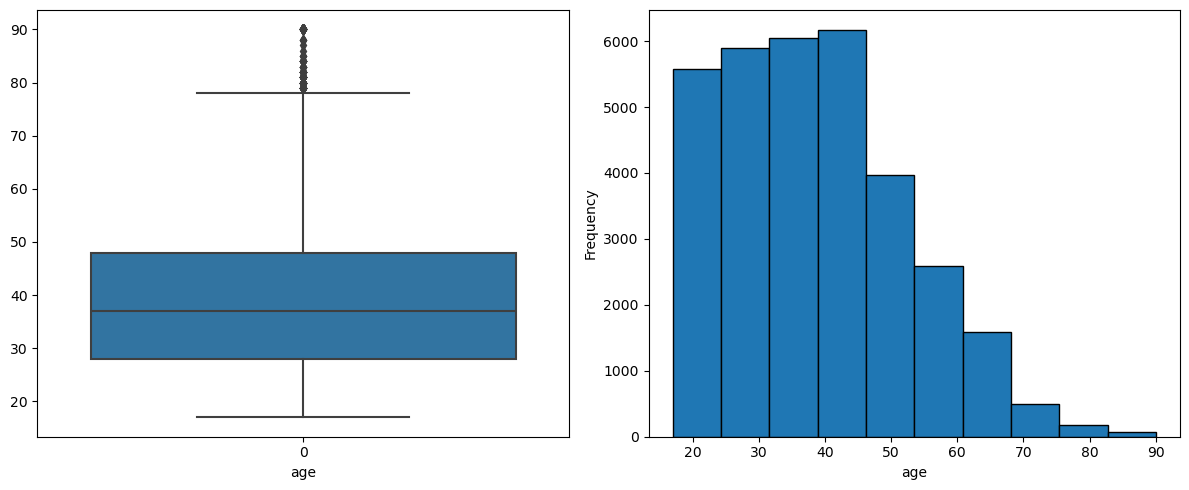

In [28]:
var_to_explore = 'age'

#Setting up the figure and axes
fig, ax = plt.subplots(1,2,figsize=(12,5)) # 1 row, 2 columns for subplots

#Boxplot on the left
sns.boxplot(df[var_to_explore], ax=ax[0])
ax[0].set_xlabel(var_to_explore)

# Histogram on the right
ax[1].hist(df[var_to_explore], edgecolor ='black') # 10 bins for illustration
ax[1].set_xlabel(var_to_explore)
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

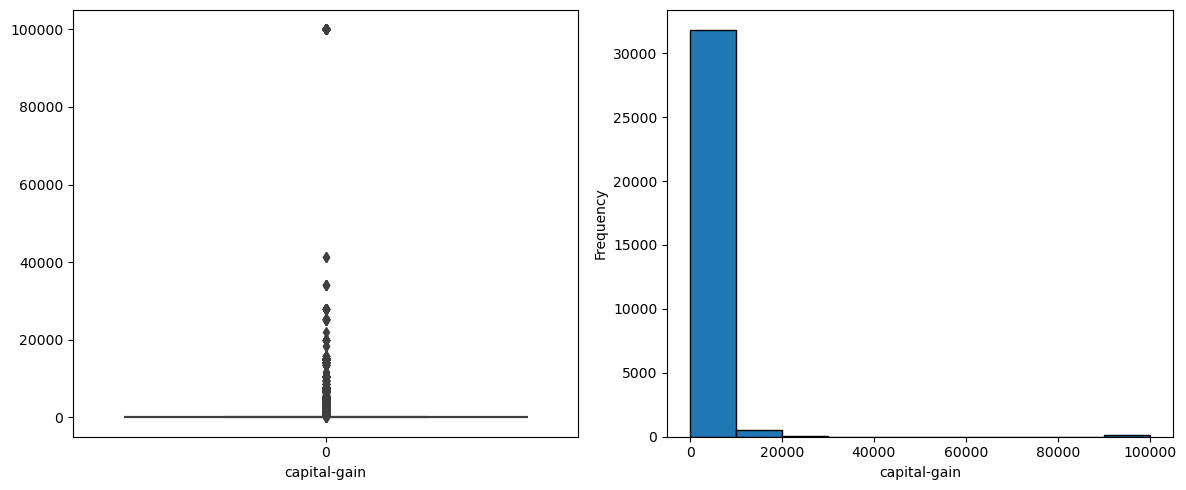

In [29]:
var_to_explore = 'capital-gain'

#Setting up the figure and axes
fig, ax = plt.subplots(1,2,figsize=(12,5)) # 1 row, 2 columns for subplots

#Boxplot on the left
sns.boxplot(df[var_to_explore], ax=ax[0])
ax[0].set_xlabel(var_to_explore)

# Histogram on the right
ax[1].hist(df[var_to_explore], edgecolor ='black') # 10 bins for illustration
ax[1].set_xlabel(var_to_explore)
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [31]:
df[df['capital-gain'] >=40000].head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1682,43,Private,176270,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K
1765,49,Private,159816,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,99999,0,20,United-States,>50K
1771,50,Private,171338,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1826,22,Self-emp-not-inc,202920,HS-grad,9,Never-married,Prof-specialty,Unmarried,White,Female,99999,0,40,Dominican-Republic,>50K
2103,43,Self-emp-inc,172826,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,99999,0,55,United-States,>50K


In [34]:
df = df[df['capital-gain'] <99999]

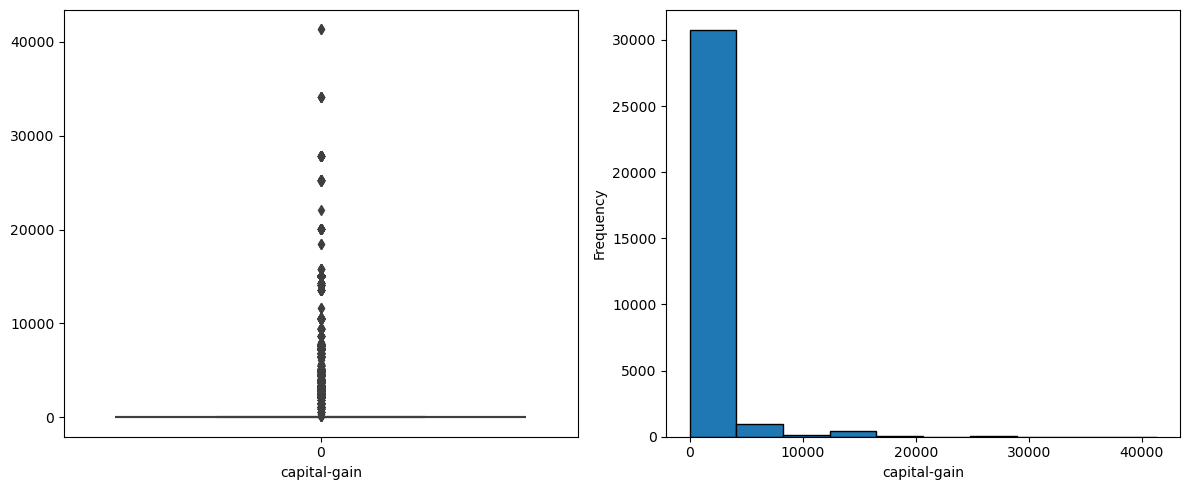

In [35]:
var_to_explore = 'capital-gain'

#Setting up the figure and axes
fig, ax = plt.subplots(1,2,figsize=(12,5)) # 1 row, 2 columns for subplots

#Boxplot on the left
sns.boxplot(df[var_to_explore], ax=ax[0])
ax[0].set_xlabel(var_to_explore)

# Histogram on the right
ax[1].hist(df[var_to_explore], edgecolor ='black') # 10 bins for illustration
ax[1].set_xlabel(var_to_explore)
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [36]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [37]:
df['income'] = df['income'].str.lstrip()
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [38]:
df['incomeBin'] = [1 if x=='>50K' else 0 for x in df['income']]
df['incomeBin']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: incomeBin, Length: 32402, dtype: int64

In [ ]:
X = df.drop(columns = ['income', 'incomeBin'])
Y = df['incomeBin']